In [ ]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np

data = pd.read_csv("AirPassengers.csv",parse_dates=["Month"],index_col=["Month"])
data1 = pd.read_csv("AirPassengers.csv")
print(data.head(10))

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
1949-06-01          135
1949-07-01          148
1949-08-01          148
1949-09-01          136
1949-10-01          119


# DIFFERENT TYPES OF VARIATION

In [ ]:
data["1949-01-01":"1949-10-01"]

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [ ]:
data.loc["1949-01-01"]

#Passengers    112
Name: 1949-01-01 00:00:00, dtype: int64

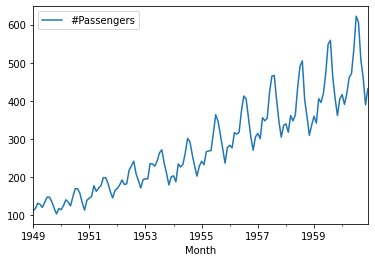

In [ ]:
data.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


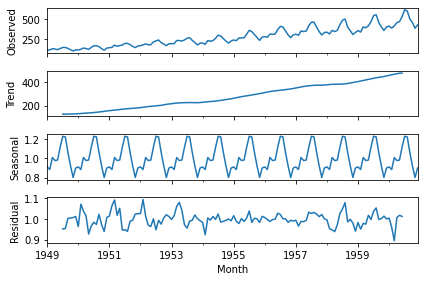

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


data_Mul_Decompose = seasonal_decompose(data,model="multiplicative")

data_Mul_Decompose.plot()
plt.show()

#You can read the residuals as being the difference between the observed values of inflation
#Seasonality show us the repeating pattern

# ARIMA MODEL



Discky Fuller Test to find if the Values Are stationary or not 

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
series = data.loc[:, '#Passengers'].values

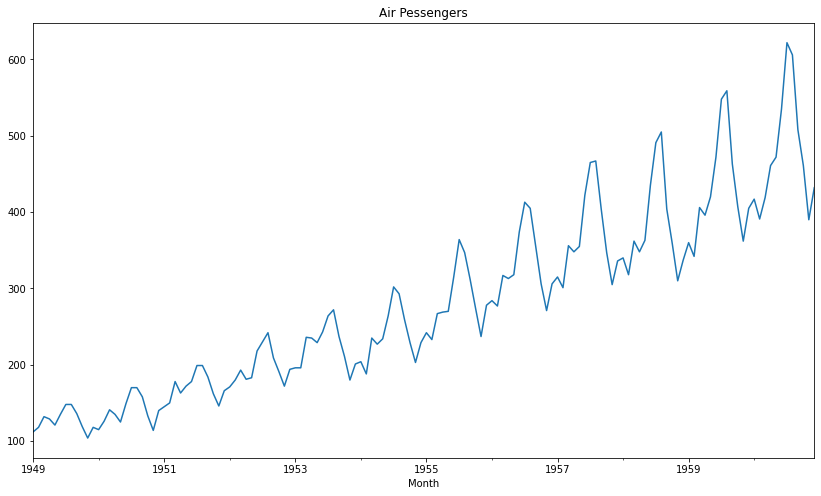

In [ ]:
data.plot(figsize=(14,8), legend=None, title='Air Pessengers');

In [ ]:
result = adfuller(series, autolag='AIC')

print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: 0.8153688792060472
n_lags: 0.991880243437641
p-value: 0.991880243437641
Critial Values:
   1%, -3.4816817173418295
Critial Values:
   5%, -2.8840418343195267
Critial Values:
   10%, -2.578770059171598


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 6.3 KB


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

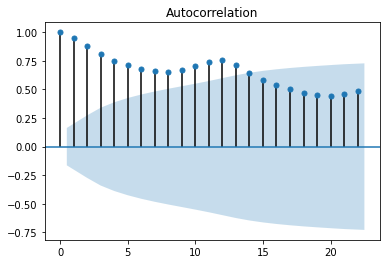

In [ ]:
ACF_plot = plot_acf(data)

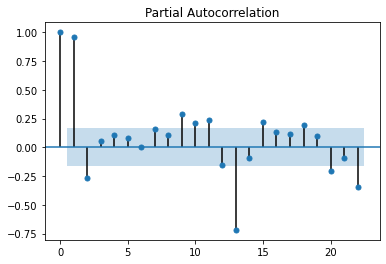

In [ ]:
pacf_plot = plot_pacf(data)

In [ ]:
train = data[:int(144/2)]
test = data[int(144/2):]

In [ ]:
test.head(10)

,#Passengers
Month,
1955-01-01,242
1955-02-01,233
1955-03-01,267
1955-04-01,269
1955-05-01,270
1955-06-01,315
1955-07-01,364
1955-08-01,347
1955-09-01,312


In [ ]:
train.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [ ]:
import itertools
import warnings
warnings.filterwarnings("ignore")

In [ ]:
p = range(0,8)
d = range(0,2)
q = range(0,8)

In [ ]:
combination = list(itertools.product(p,d,q))

In [ ]:
import statsmodels.api as sm

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
orders = []
rmse = []
for i in combination:
  try:
    model = ARIMA(train,order = i).fit()
    pred = model.predict(start = len(train),end = len(data)-1)
    error = np.sqrt(mean_squared_error(test,pred))
    rmse.append(error)
    orders.append(i)
  except:
    continue



In [ ]:
p,d,q = orders[rmse.index(min(rmse))]
print(p,d,q)
print(min(rmse))

rmse
orders

3 0 3
61.92346825647696


[(0, 0, 1),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 6),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 5),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 3),
 (3, 0, 5),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 5),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 4),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5, 0, 4),
 (5, 0, 6),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (6, 0, 0),
 (6, 0, 1),
 (6, 0, 2),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 5),
 (7, 0, 0),
 (7, 0, 1),
 (7, 0, 2),
 (7, 1, 0),
 (7, 1, 1),
 (7, 1, 4),
 (7, 1, 5)]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

finalModel = ARIMA(train,order = (p,d,q)).fit()

prediction = finalModel.predict(start = len(train),end = len(data)-1)


In [ ]:
prediction.head(10)

1955-01-01    241.148778
1955-02-01    243.826013
1955-03-01    246.797654
1955-04-01    249.541605
1955-05-01    252.578909
1955-06-01    255.389379
1955-07-01    258.492149
1955-08-01    261.368936
1955-09-01    264.536972
1955-10-01    267.479870
Freq: MS, dtype: float64

In [ ]:
test.head(10)

,#Passengers
Month,
1955-01-01,242
1955-02-01,233
1955-03-01,267
1955-04-01,269
1955-05-01,270
1955-06-01,315
1955-07-01,364
1955-08-01,347
1955-09-01,312


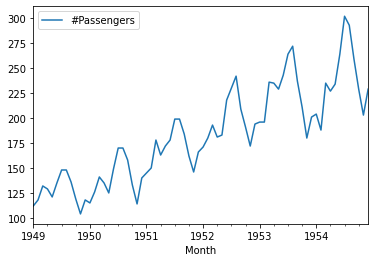

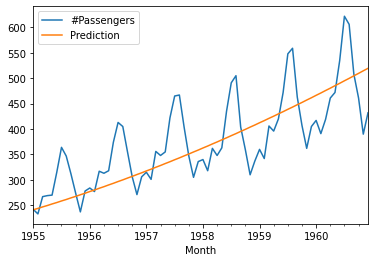

In [ ]:
train.plot(legend = True , label = "Train")
test.plot(legend = True , label = "Test")
prediction.plot(legend = True , label = "Prediction")

plt.show()

# SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)


In [ ]:
mod = sm.tsa.statespace.SARIMAX(train,
                                    order=(0,1,1),
                                    seasonal_order=(0,1,1,12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
results=mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        #Passengers   No. Observations:                   72
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -167.087
Date:                            Thu, 21 Apr 2022   AIC                            340.174
Time:                                    17:16:06   BIC                            345.594
Sample:                                01-01-1949   HQIC                           342.195
                                     - 12-01-1954                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2719      0.132     -2.060      0.039      -0.531      -0.013
ma.S.L12      -0.4029      0.200   

In [ ]:
pred = results.predict(start=(len(train)), end=(len(data)-1))

In [ ]:
pred.tail()

1960-08-01    422.163567
1960-09-01    389.334430
1960-10-01    361.977391
1960-11-01    336.063736
1960-12-01    360.128563
Freq: MS, dtype: float64

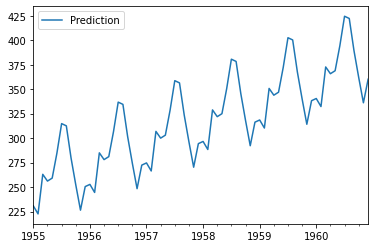

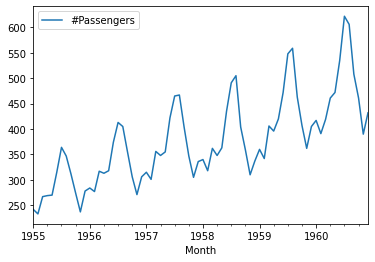

In [ ]:
pred.plot(legend = True , label = "Prediction")
test.plot(legend = True , label = "Test")
plt.legend()